# 1. 載入所需套件

In [ ]:
# 從 sklearn 載入鳶尾花資料集套件
from sklearn.datasets import load_iris

# 載入我們會用到的模型，K-means模型
from sklearn.cluster import KMeans

# 載入用來做資料視覺化的畫圖套件
import matplotlib.pyplot as plt

# 載入 3D 繪圖工具
from mpl_toolkits.mplot3d import Axes3D

# 2. 載入資料集，觀察資料集

In [ ]:
# 載入資料集，放到 iris變數內
iris = load_iris()

# 觀察有哪些 key 在資料集內
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [ ]:
# 觀察資料筆數
print("資料筆數:")
print(iris.data.shape, "\n")

# 觀察我們資料的欄位名稱
print("資料的欄位名稱，分別是:")
print(iris.feature_names, "\n")

# 觀察我們第一筆的資料內容
print("第一筆的資料內容:")
print(iris.data[0], "\n")

# 觀察我們第一筆的預測目標
print("第一筆的預測目標:")
print(iris.target[0], "\n")

資料筆數:
(150, 4) 

資料的欄位名稱，分別是:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 

第一筆的資料內容:
[5.1 3.5 1.4 0.2] 

第一筆的預測目標:
0 



### 鳶尾花的資料集從上述可以發現有四個特徵
- sepal length (cm) : 花萼長度
- sepal width  (cm) : 花萼寬度
- petal length (cm) : 花瓣長度
- petal width  (cm) : 花瓣寬度

我們可以利用資料視覺化的方法讓我們來觀察資料!

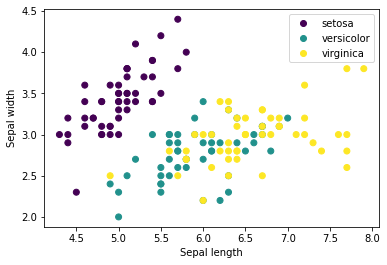

In [ ]:
# 繪製散點圖，利用花萼長度及花萼寬度作圖，不同的顏色代表不同種的鳶尾花
scatter = plt.scatter(iris.data[:,0], iris.data[:,1], c=iris.target)

# 我們可以在 x,y 軸設定標題名稱
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

# 可以設定一個說明視窗, 裡面分別放置顏色點及對應的類別名稱
# 第一個參數設定我們的點, 第二個參數設定名稱
plt.legend( handles= scatter.legend_elements()[0], labels= iris.target_names.tolist())

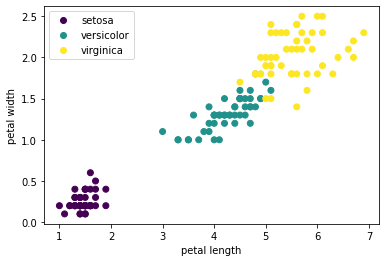

In [ ]:
# 繪製散點圖，利用花瓣長度及花瓣寬度作圖，不同的顏色代表不同種的鳶尾花
scatter = plt.scatter(iris.data[:,2], iris.data[:,3], c=iris.target)

# 我們可以在 x,y 軸設定標題名稱
plt.xlabel('petal length')
plt.ylabel('petal width')

plt.legend( handles= scatter.legend_elements()[0], labels= iris.target_names.tolist())

# 3. 訓練模型及驗證模型

In [ ]:
# 載入 K-means 模型，設定將資料分成三群
estimator = KMeans(n_clusters=3, random_state=54)

# 進行模型訓練，因為K-means是非監督式學習，故不用放入label的標籤資料
estimator.fit(iris.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=54, tol=0.0001, verbose=0)

In [ ]:
# 印出分群好的標籤來觀察
print(estimator.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [ ]:
# 印出K-means 分群好的中心點
estimator.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

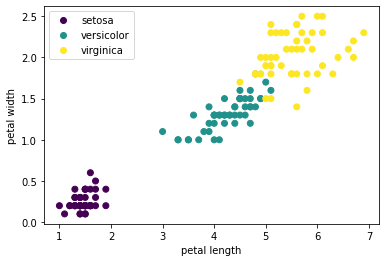

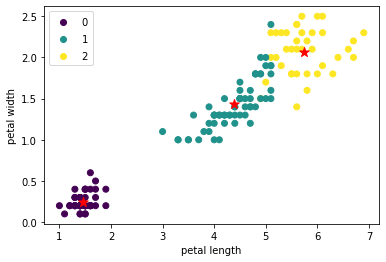

In [ ]:
# 這張圖用原始的label來作圖
scatter = plt.scatter(iris.data[:,2], iris.data[:,3], c=iris.target)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend( handles= scatter.legend_elements()[0], labels= iris.target_names.tolist())
plt.show()

# 這張圖用KMeans分群好的label來作圖
scatter = plt.scatter(iris.data[:,2], iris.data[:,3], c=estimator.labels_)
plt.xlabel('petal length')
plt.ylabel('petal width')

# 我們可以把 K-means 找到的中心位置給畫出來, 我們畫成星號、配置紅色、s為size的縮寫, 及設置大小
plt.scatter(estimator.cluster_centers_[:,2], estimator.cluster_centers_[:,3] 
            ,marker='*', c='red' , s=100)
plt.legend( *scatter.legend_elements())
plt.show()

# 更上層樓！使用3D繪圖來做視覺化

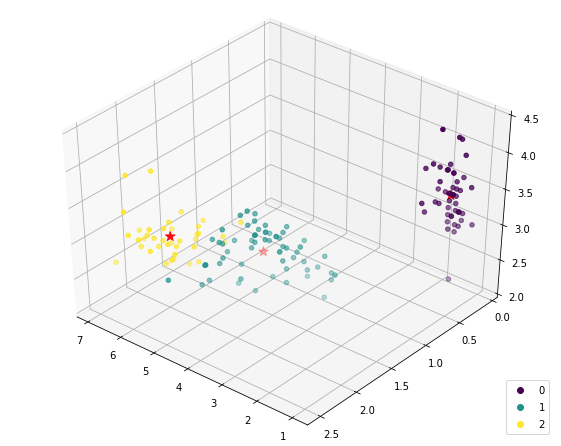

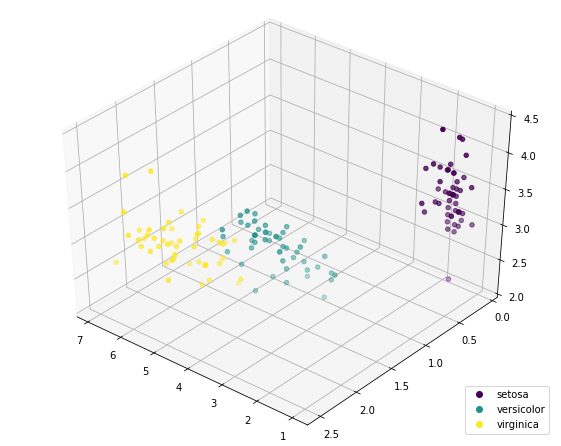

In [ ]:
# 這邊的 3D繪圖屬於較高階的作法，如果想要得到更詳細的資料可以到官網查詢:
# https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#scatter-plots

# 接下來三行是繪圖環境的設置
# elev 是從不同的高度視角看過去
# azim 是從不同的水平角度看過去
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=40, azim=130)
ax.set_zlim(2, 4.5)

# 以下是繪圖資訊，這次的繪圖有兩個部分
# 1.) 先將鳶尾花的資料匯出:  iris.data[:, 2], iris.data[:, 3], iris.data[:, 1]，這邊有三個特徵被我們拿出來做三個維度的座標
# 2.) c 參數是顏色變數，我們說我們的剛剛畫上空間的每一顆資料的顏色會根據 label 而決定，
#     而 label 是根據 estimator 也就是 kmeans訓練過的模型結果
ax.scatter(iris.data[:, 2], iris.data[:, 3], iris.data[:, 1], c=estimator.labels_)
ax.scatter(estimator.cluster_centers_[:,2], estimator.cluster_centers_[:,3], estimator.cluster_centers_[:,1], marker='*', c='red', s=100)

plt.legend( *scatter.legend_elements(), loc='lower right')
plt.show()

# 同時我們也可以印出原始的label資料來做比較
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=40, azim=130)
ax.set_zlim(2, 4.5)

# 記得這邊的 c 要改回原始的target
ax.scatter(iris.data[:, 2], iris.data[:, 3], iris.data[:, 1], c=iris.target)

plt.legend( handles= scatter.legend_elements()[0], labels= iris.target_names.tolist(), loc='lower right')
plt.show()